This notebook is for testing the inference algorithm

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

%matplotlib inline

In [2]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)


# Speficy whether or not to save figures
save_figures = True

In [66]:
def generate_switch_world(prob, ntrials):
    '''
    Generate a world with defined number of trials
    ntrials: an array of num trials in each block
    prob: probability of reward in each block
    '''
    assert len(prob) == len(ntrials)
    targets = []
    truestates = []
    for i in range(len(prob)):
        probi = prob[i]
        ntrialsi = ntrials[i]
        truestate_i = [probi] * ntrialsi
        targets += list(np.random.rand(ntrialsi) < probi)
        truestates += list(truestate_i)
        
    
    return np.array(truestates), np.array(targets)[:,None]
    
    

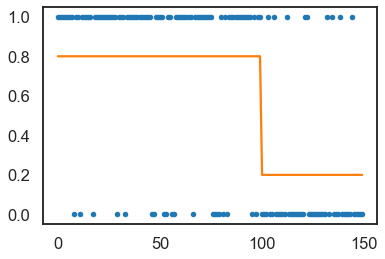

In [72]:
truestates, obs = generate_switch_world([0.8, 0.2, 0.8, 0.2], [100, 150, 130, 120])
plt.plot(obs[:150], '.')
plt.plot(truestates[:150])

In [73]:
obs

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [58]:
obs = obs[:,None]


In [59]:
obs.shape

(500, 1)

In [47]:
# HMM simulations
# Set the parameters of the HMM
time_bins = 1000   # number of time bins
num_states = 2    # number of discrete states
obs_dim = 1      # dimensionality of observation

# Make an HMM
true_hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

# Manually tweak the means to make them farther apart
#thetas = np.linspace(0, 2 * np.pi, num_states, endpoint=False)
#true_hmm.observations.mus = 3 * np.column_stack((np.cos(thetas), np.sin(thetas)))

In [48]:
true_hmm.observations.params = np.array([[0.0], [1]])

In [49]:
# Sample some data from the HMM
true_states, obs = true_hmm.sample(time_bins)
true_ll = true_hmm.log_probability(obs)

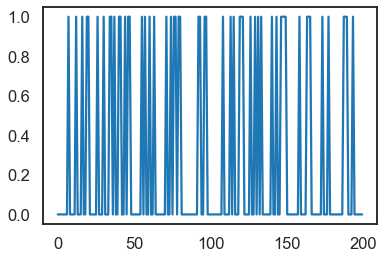

In [50]:
plt.plot(obs[200:400])

(0, 300)

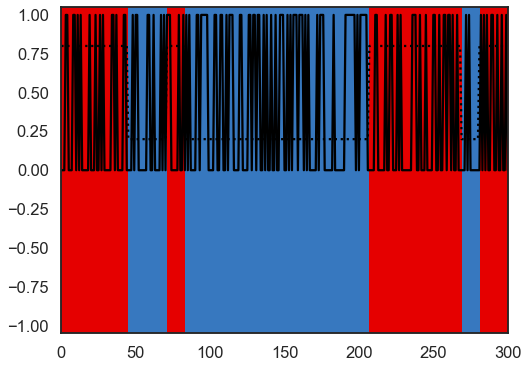

In [30]:
# Plot the data and the smoothed data
#lim = 1.05 * abs(obs).max()
plt.figure(figsize=(8, 6))
plt.imshow(true_states[None,:],
           aspect="auto",
           cmap=cmap,
           vmin=0,
           vmax=len(colors)-1,
           extent=(0, time_bins, -lim, (obs_dim)*lim))

Ey = true_hmm.observations.params[true_states]
plt.plot(obs, '-k')
plt.plot(Ey, ':k')
plt.xlim([0, 300])

# plt.xlim(0, time_bins)
# plt.xlabel("time")
# plt.yticks(lim * np.arange(obs_dim), ["$x_{}$".format(d+1) for d in range(obs_dim)])

# plt.title("Simulated data from an HMM")

# plt.tight_layout()

# if save_figures:
#     plt.savefig("hmm_2.pdf")

In [54]:
obs.shape

(1000, 1)

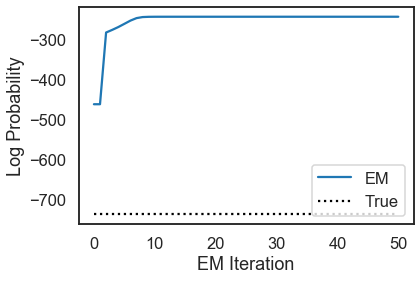

In [92]:
# Fit to observed data
data = obs # Treat observations generated above as synthetic data.
N_iters = 50
num_states = 2
obs_dim = 1

## testing the constrained transitions class
hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

hmm_lls = hmm.fit(obs, method="em", num_iters=N_iters, init_method="kmeans")

plt.plot(hmm_lls, label="EM")
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [98]:
obs

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

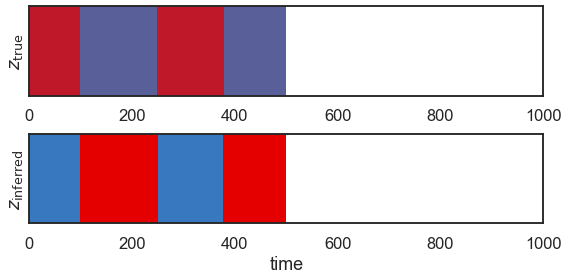

In [93]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(data)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(truestates[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

plt.subplot(212)
plt.imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

In [77]:
# Load example e54 choices
folder = '/Users/minhnhatle/Documents/ExternalCode/rigbox_analysis'
filename = 'e54choices_051721.mat'
data = scipy.io.loadmat(folder + '/' + filename)

In [80]:
choices = data['choices']

In [88]:
choices[choices == 0] = -1
choices = choices.T

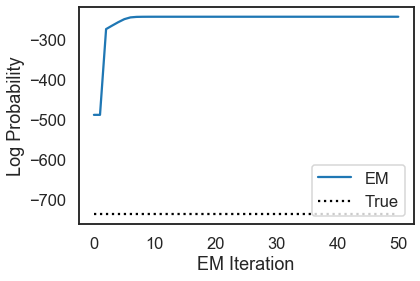

In [110]:
# Fit to observed data
data = (choices + 1) / 2 # Treat observations generated above as synthetic data.
data = data.astype('bool')
N_iters = 50
num_states = 2
obs_dim = 1

## testing the constrained transitions class
hmm = ssm.HMM(num_states, obs_dim, observations="bernoulli")

hmm_lls = hmm.fit(obs, method="em", num_iters=N_iters, init_method="kmeans")

plt.plot(hmm_lls, label="EM")
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

In [109]:
data.astype('bool')

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [106]:
hmm.log_likelihood(data)

AssertionError: 

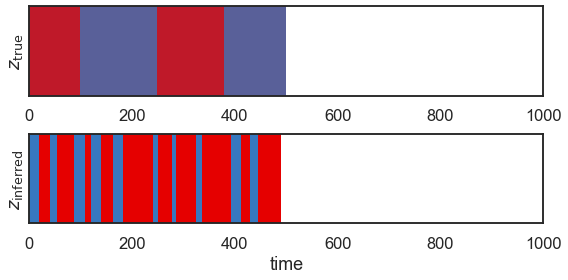

In [111]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(data)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(truestates[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

plt.subplot(212)
plt.imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, time_bins)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

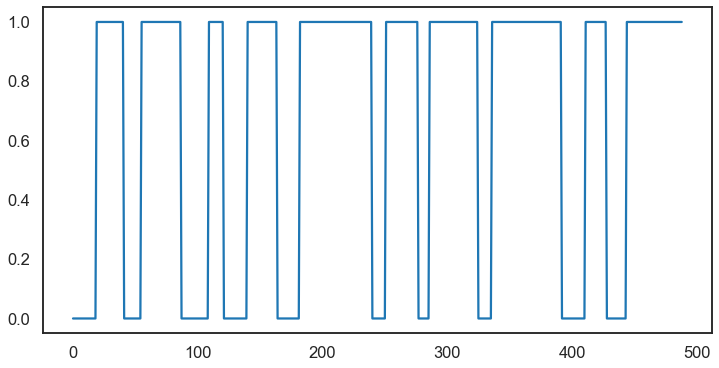

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(hmm_z)